## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.708554 -0.134585 -0.422572 -0.621483 -0.791241 -0.382329
1 -0.363196  0.503689  0.295773 -0.516836 -0.481994 -0.506483
2 -0.131684 -0.166760 -1.207280 -0.439593 -1.076472 -0.468854
3  1.424750 -0.487340  1.449595 -0.721487  0.259189  0.733448
4  0.172810 -0.740556 -1.108746 -0.522082  0.463334 -0.389423


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9565991	total: 55.6ms	remaining: 55.5s
1:	learn: 0.9474347	total: 56.2ms	remaining: 28.1s
2:	learn: 0.9375758	total: 56.7ms	remaining: 18.9s
3:	learn: 0.9287884	total: 57.2ms	remaining: 14.2s
4:	learn: 0.9208251	total: 57.8ms	remaining: 11.5s
5:	learn: 0.9143744	total: 58.5ms	remaining: 9.68s
6:	learn: 0.9050206	total: 59ms	remaining: 8.36s
7:	learn: 0.8958533	total: 59.4ms	remaining: 7.37s
8:	learn: 0.8866337	total: 59.9ms	remaining: 6.59s
9:	learn: 0.8791134	total: 60.4ms	remaining: 5.98s
10:	learn: 0.8703141	total: 60.9ms	remaining: 5.48s
11:	learn: 0.8610928	total: 61.5ms	remaining: 5.06s
12:	learn: 0.8524689	total: 61.9ms	remaining: 4.7s
13:	learn: 0.8457914	total: 62.4ms	remaining: 4.39s
14:	learn: 0.8370371	total: 63ms	remaining: 4.13s
15:	learn: 0.8287547	total: 63.3ms	remaining: 3.89s
16:	learn: 0.8205071	total: 63.8ms	remaining: 3.69s
17:	learn: 0.8122240	total: 64.3ms	remaining: 3.51s
18:	learn: 0.8038995	total: 64.7ms	remaining: 3.3

83:	learn: 0.4581635	total: 102ms	remaining: 1.11s
84:	learn: 0.4541972	total: 103ms	remaining: 1.1s
85:	learn: 0.4505065	total: 103ms	remaining: 1.09s
86:	learn: 0.4469586	total: 104ms	remaining: 1.09s
87:	learn: 0.4439660	total: 104ms	remaining: 1.08s
88:	learn: 0.4404504	total: 105ms	remaining: 1.07s
89:	learn: 0.4376220	total: 105ms	remaining: 1.06s
90:	learn: 0.4341486	total: 106ms	remaining: 1.05s
91:	learn: 0.4302795	total: 106ms	remaining: 1.05s
92:	learn: 0.4265806	total: 106ms	remaining: 1.04s
93:	learn: 0.4231983	total: 107ms	remaining: 1.03s
94:	learn: 0.4198880	total: 107ms	remaining: 1.02s
95:	learn: 0.4168353	total: 108ms	remaining: 1.01s
96:	learn: 0.4137407	total: 108ms	remaining: 1.01s
97:	learn: 0.4105814	total: 109ms	remaining: 1s
98:	learn: 0.4071084	total: 109ms	remaining: 994ms
99:	learn: 0.4043294	total: 110ms	remaining: 988ms
100:	learn: 0.4019947	total: 110ms	remaining: 982ms
101:	learn: 0.3987399	total: 111ms	remaining: 975ms
102:	learn: 0.3956005	total: 112m

247:	learn: 0.1483599	total: 185ms	remaining: 562ms
248:	learn: 0.1477492	total: 186ms	remaining: 560ms
249:	learn: 0.1469047	total: 187ms	remaining: 562ms
250:	learn: 0.1459538	total: 188ms	remaining: 561ms
251:	learn: 0.1448945	total: 188ms	remaining: 559ms
252:	learn: 0.1441705	total: 189ms	remaining: 558ms
253:	learn: 0.1432718	total: 189ms	remaining: 556ms
254:	learn: 0.1423615	total: 190ms	remaining: 555ms
255:	learn: 0.1414609	total: 190ms	remaining: 553ms
256:	learn: 0.1406264	total: 191ms	remaining: 552ms
257:	learn: 0.1397332	total: 191ms	remaining: 550ms
258:	learn: 0.1389069	total: 192ms	remaining: 548ms
259:	learn: 0.1383888	total: 192ms	remaining: 547ms
260:	learn: 0.1378374	total: 193ms	remaining: 545ms
261:	learn: 0.1372157	total: 193ms	remaining: 544ms
262:	learn: 0.1366451	total: 194ms	remaining: 542ms
263:	learn: 0.1360499	total: 194ms	remaining: 541ms
264:	learn: 0.1351230	total: 194ms	remaining: 539ms
265:	learn: 0.1341458	total: 195ms	remaining: 538ms
266:	learn: 

435:	learn: 0.0497134	total: 282ms	remaining: 365ms
436:	learn: 0.0495871	total: 283ms	remaining: 364ms
437:	learn: 0.0492944	total: 283ms	remaining: 363ms
438:	learn: 0.0491356	total: 284ms	remaining: 363ms
439:	learn: 0.0488314	total: 284ms	remaining: 362ms
440:	learn: 0.0485332	total: 284ms	remaining: 361ms
441:	learn: 0.0483001	total: 285ms	remaining: 360ms
442:	learn: 0.0481473	total: 285ms	remaining: 359ms
443:	learn: 0.0478568	total: 286ms	remaining: 358ms
444:	learn: 0.0475779	total: 286ms	remaining: 357ms
445:	learn: 0.0474637	total: 286ms	remaining: 356ms
446:	learn: 0.0472334	total: 287ms	remaining: 355ms
447:	learn: 0.0470076	total: 287ms	remaining: 354ms
448:	learn: 0.0468625	total: 288ms	remaining: 353ms
449:	learn: 0.0465797	total: 288ms	remaining: 352ms
450:	learn: 0.0463156	total: 289ms	remaining: 351ms
451:	learn: 0.0460953	total: 289ms	remaining: 351ms
452:	learn: 0.0458760	total: 290ms	remaining: 350ms
453:	learn: 0.0456076	total: 290ms	remaining: 349ms
454:	learn: 

590:	learn: 0.0253910	total: 366ms	remaining: 253ms
591:	learn: 0.0253461	total: 367ms	remaining: 253ms
592:	learn: 0.0252947	total: 368ms	remaining: 252ms
593:	learn: 0.0252081	total: 368ms	remaining: 252ms
594:	learn: 0.0251576	total: 369ms	remaining: 251ms
595:	learn: 0.0251145	total: 369ms	remaining: 250ms
596:	learn: 0.0250649	total: 370ms	remaining: 250ms
597:	learn: 0.0249031	total: 370ms	remaining: 249ms
598:	learn: 0.0247281	total: 371ms	remaining: 248ms
599:	learn: 0.0246525	total: 371ms	remaining: 247ms
600:	learn: 0.0246044	total: 372ms	remaining: 247ms
601:	learn: 0.0245650	total: 372ms	remaining: 246ms
602:	learn: 0.0244084	total: 372ms	remaining: 245ms
603:	learn: 0.0243011	total: 373ms	remaining: 245ms
604:	learn: 0.0242633	total: 374ms	remaining: 244ms
605:	learn: 0.0241947	total: 374ms	remaining: 243ms
606:	learn: 0.0240634	total: 374ms	remaining: 242ms
607:	learn: 0.0240171	total: 375ms	remaining: 242ms
608:	learn: 0.0238666	total: 375ms	remaining: 241ms
609:	learn: 

779:	learn: 0.0127181	total: 462ms	remaining: 130ms
780:	learn: 0.0126702	total: 463ms	remaining: 130ms
781:	learn: 0.0126275	total: 463ms	remaining: 129ms
782:	learn: 0.0125598	total: 463ms	remaining: 128ms
783:	learn: 0.0124936	total: 464ms	remaining: 128ms
784:	learn: 0.0124466	total: 464ms	remaining: 127ms
785:	learn: 0.0124020	total: 465ms	remaining: 127ms
786:	learn: 0.0123852	total: 465ms	remaining: 126ms
787:	learn: 0.0123270	total: 466ms	remaining: 125ms
788:	learn: 0.0122820	total: 466ms	remaining: 125ms
789:	learn: 0.0122479	total: 467ms	remaining: 124ms
790:	learn: 0.0122235	total: 467ms	remaining: 124ms
791:	learn: 0.0121767	total: 468ms	remaining: 123ms
792:	learn: 0.0121203	total: 468ms	remaining: 122ms
793:	learn: 0.0120970	total: 468ms	remaining: 122ms
794:	learn: 0.0120740	total: 469ms	remaining: 121ms
795:	learn: 0.0120083	total: 470ms	remaining: 120ms
796:	learn: 0.0119573	total: 470ms	remaining: 120ms
797:	learn: 0.0119075	total: 471ms	remaining: 119ms
798:	learn: 

950:	learn: 0.0076486	total: 547ms	remaining: 28.2ms
951:	learn: 0.0076395	total: 548ms	remaining: 27.6ms
952:	learn: 0.0076305	total: 548ms	remaining: 27ms
953:	learn: 0.0076198	total: 549ms	remaining: 26.5ms
954:	learn: 0.0076110	total: 549ms	remaining: 25.9ms
955:	learn: 0.0075810	total: 550ms	remaining: 25.3ms
956:	learn: 0.0075450	total: 550ms	remaining: 24.7ms
957:	learn: 0.0075234	total: 551ms	remaining: 24.1ms
958:	learn: 0.0075109	total: 551ms	remaining: 23.6ms
959:	learn: 0.0075023	total: 551ms	remaining: 23ms
960:	learn: 0.0074939	total: 552ms	remaining: 22.4ms
961:	learn: 0.0074648	total: 552ms	remaining: 21.8ms
962:	learn: 0.0074301	total: 553ms	remaining: 21.2ms
963:	learn: 0.0074140	total: 553ms	remaining: 20.6ms
964:	learn: 0.0074058	total: 553ms	remaining: 20.1ms
965:	learn: 0.0073947	total: 554ms	remaining: 19.5ms
966:	learn: 0.0073630	total: 554ms	remaining: 18.9ms
967:	learn: 0.0073550	total: 555ms	remaining: 18.3ms
968:	learn: 0.0073451	total: 555ms	remaining: 17.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

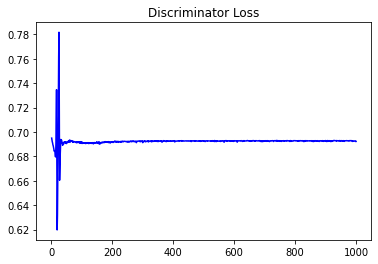

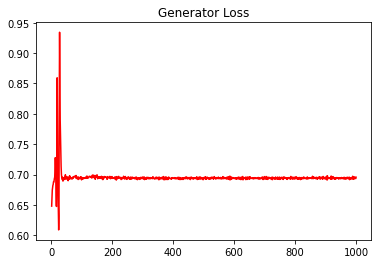

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06467274956516414


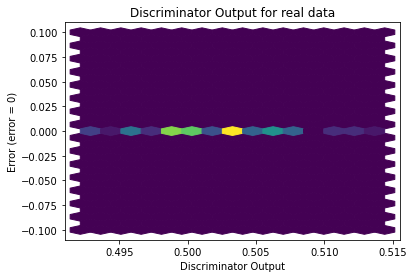

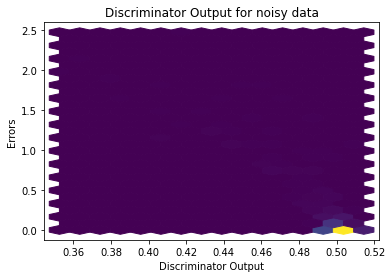

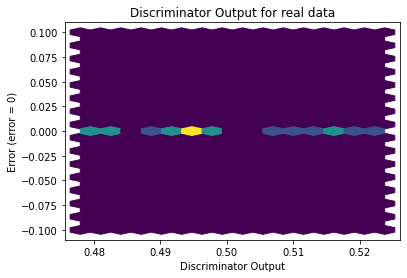

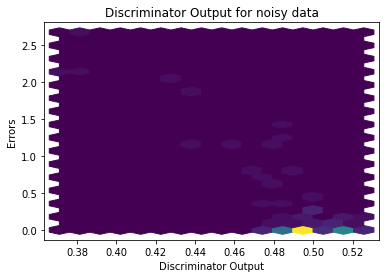

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


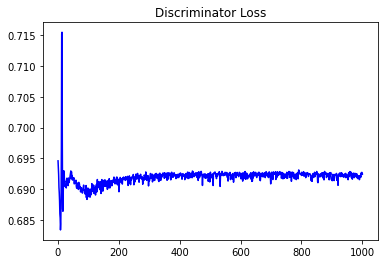

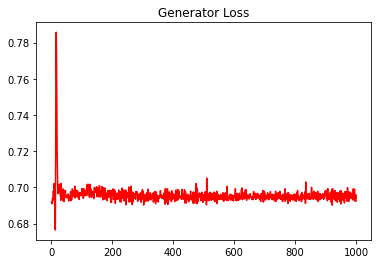

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.040745610088110715


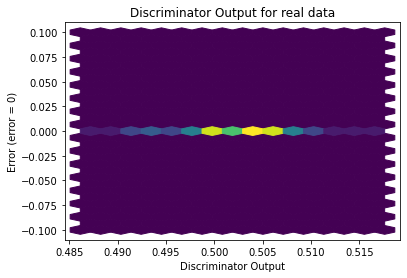

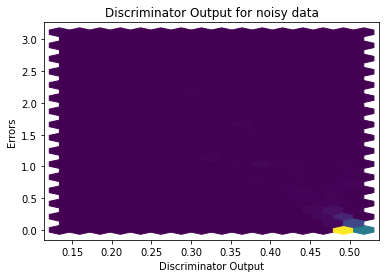

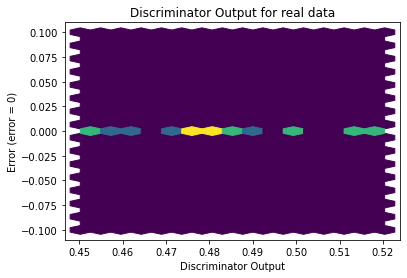

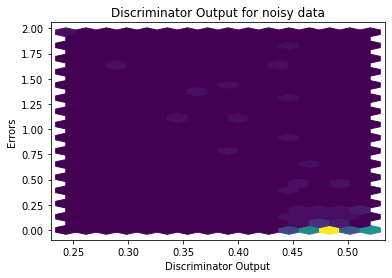

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9162]], requires_grad=True)
